In [114]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import pandas as pd

In [115]:
def plot_loess_curve(grid, index):
    # Read and transform grid
    grid_gdf = gpd.read_file(f'grids/{grid}km_behrmann_grid.shp')
    grid_gdf = grid_gdf.to_crs(epsg=4326)

    # Read iNEXT results and join the two dataframes by the grid id
    output_df = pd.read_csv(f'iNext_output/{grid}_summary.csv')
    output_df["tile_id"] = output_df["id"]
    grid_gdf = grid_gdf.merge(output_df, on='tile_id')

    # Calculate centroids
    # Ensure CRS is correctly set to Behrmann (ESRI:54017)
    if grid_gdf.crs is None or grid_gdf.crs.to_string() != "ESRI:54017":
        grid_gdf = grid_gdf.to_crs("ESRI:54017")  # Explicitly set Behrmann CRS
    grid_gdf["centroid"] = grid_gdf.geometry.centroid
    centroid_gdf = gpd.GeoDataFrame(geometry=grid_gdf["centroid"], crs=grid_gdf.crs)
    centroid_gdf = centroid_gdf.to_crs(epsg=4326)
    grid_gdf["longitude"] = centroid_gdf.geometry.x
    grid_gdf["latitude"] = centroid_gdf.geometry.y


    # Calculate loess curve
    y = grid_gdf[index].to_numpy()
    x = grid_gdf["latitude"].to_numpy()
    lowess_results = sm.nonparametric.lowess(y, x, frac=0.3)

    # Extract smoothed values
    x_smooth, y_smooth = lowess_results[:, 0], lowess_results[:, 1]

    # Plot the original data and the LOWESS curve
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Raw Data", color="gray", alpha=0.6)
    plt.plot(x_smooth, y_smooth, label="LOWESS Curve", color="red", linewidth=2)
    plt.xlabel("Latitude")
    plt.ylabel(index)
    plt.legend()
    plt.title("LOWESS Curve Example")
    plt.show()

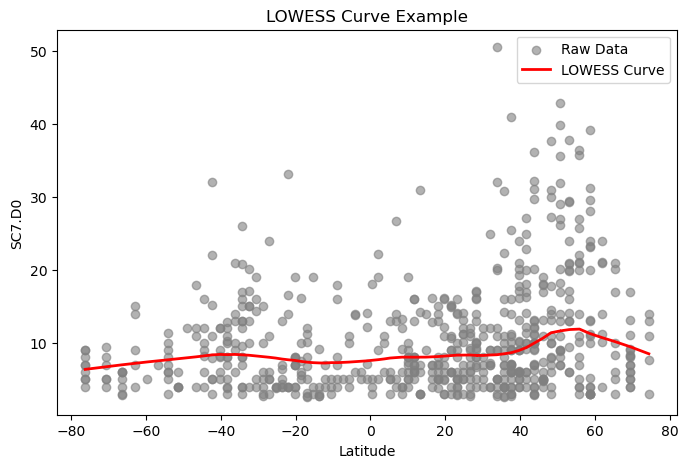

In [121]:
grid = "200"
plot_loess_curve(grid, "SC7.D0")